<a href="https://colab.research.google.com/github/Rolo123y/MSCI-446/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
# Import general dataframe libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random as rd
import sklearn

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

In [2]:
# Read dataset from google drive, import file: NCDB_2017.csv
# Change directories as needed
from google.colab import drive
drive.mount('/content/gdrive')
dataset = pd.read_csv('/content/gdrive/MyDrive/MSCI 446/NCDB_2017.csv')
dataset

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2017,1,1,10,2,1,02,03,1,3,2,18,01,01,UUUU,01,M,75,11,2,NN,1,2455950
1,2017,1,1,12,2,1,04,UU,1,5,1,UU,01,01,UUUU,01,F,21,11,2,02,1,2455959
2,2017,1,1,00,2,1,03,UU,7,3,1,UU,01,01,UUUU,01,F,34,11,2,02,1,2455998
3,2017,1,1,17,2,2,21,UU,1,1,1,18,01,01,UUUU,01,F,50,11,2,02,1,2456104
4,2017,1,1,17,2,2,21,UU,1,1,1,18,02,01,UUUU,01,M,63,11,1,NN,1,2456104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289836,2017,UU,U,UU,2,UU,UU,01,U,U,U,UU,11,01,UUUU,01,F,20,11,1,NN,1,2455828
289837,2017,UU,U,UU,2,UU,UU,01,U,U,U,UU,12,01,UUUU,01,F,47,11,1,NN,1,2455828
289838,2017,UU,U,UU,2,UU,UU,01,U,U,U,UU,13,07,UUUU,01,M,24,11,1,NN,1,2455828
289839,2017,UU,U,23,2,01,03,01,1,1,2,18,01,16,UUUU,01,M,45,96,2,09,U,2570233


In [3]:
# cleaning the C_SEV Data to remove unwanted 'U' and 'X' values
df = dataset
# Choose only relavant values in Severity column 
# where 1 = No injury, 2 = injury, 3 = Fatality
df = df[df.P_ISEV.isin(["1","2","3"])]
# Category severity into binary variable  
# where 0 = no fataility, 1 = fatality
indicies = df[df.P_ISEV.isin(["1","2"])].index
df.P_ISEV[indicies] = 0
indicies = df[df.P_ISEV.isin(["3"])].index
df.P_ISEV[indicies] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1060: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, 

#### Overall Distribution of fatalities

Text(1, 1856, '1856')

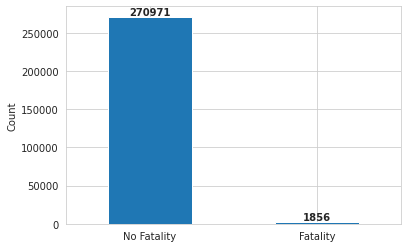

In [4]:
# Calculate number of fatalities and non-fatalities
overall = df.groupby(['P_ISEV']).size()
overall.plot.bar()
plt.xticks(np.arange(2), ('No Fatality', 'Fatality'), rotation = 'horizontal')
plt.xlabel('')
plt.ylabel('Count')
plt.text(0, overall[0],str(overall[0]), fontweight='bold',ha='center', va='bottom')
plt.text(1, overall[1],str(overall[1]), fontweight='bold',ha='center', va='bottom')

## Headers to use as features
C_MNTH
C_CONF
C_RCFG
C_WTHR
C_RSUR
C_RALN
V_TYPE
P_SEX
P_USER
(*P_AGE*)

## Data visualizations for each category

In [5]:
## Functions to generate data formats
# Convert data type in a column to numeric
def toNum(df, categ):
    df.loc[:, categ] = pd.to_numeric(df[categ])
    return df
# Calculate total fatalities in each category of a given dataframe
def calFatal(df, categ):
    fatalCateg = df[df.P_ISEV.isin([1])].value_counts(subset= categ, sort = False)
    return fatalCateg

# Calculate total collisions in each category of a given dataframe
def calTC(df, categ):
    return df.value_counts(subset=categ, sort = False)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


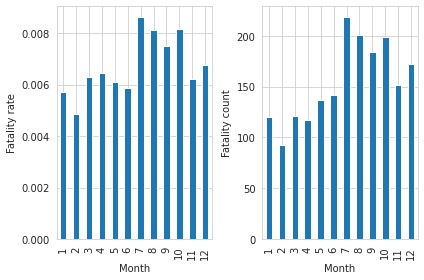

In [6]:
## By Month
# Remove non-valid data
dfplotMonth = df[~df.C_MNTH.isin(['UU'])]
# Convert data type to numeric
dfplotMonth = toNum(dfplotMonth, "C_MNTH")
## Calculate proportion using groupby category
# Total Collisions
tcMonth = calTC(dfplotMonth, "C_MNTH")
# Total fatalities
fatalMonth = calFatal(dfplotMonth, "C_MNTH")
# Calculate proportion of fatalities to collisions in each category
propMonth = fatalMonth/tcMonth 
# Plot the bar graph for fatality rate
plt.subplot(1, 2, 1)
propMonth.plot.bar()
plt.xlabel('Month')
plt.ylabel('Fatality rate')

#Plot bar graph for count of falities
plt.subplot(1, 2, 2)
fatalMonth.plot.bar()
plt.xlabel('Month')
plt.ylabel('Fatality count')
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


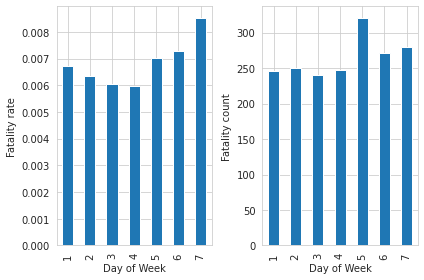

In [7]:
## By week of day
# Remove non-valid data
dfplotWday = df[~df.C_WDAY.isin(['U','X'])]
dfplotWday= toNum(dfplotWday, "C_WDAY")
## Calculate proportion using groupby category
tcWday = calTC(dfplotWday, "C_WDAY")
fatalWday = calFatal(dfplotWday, "C_WDAY")
propWday = fatalWday/tcWday
# Plot the bar graph for fatality rate
plt.subplot(1, 2, 1)
propWday.plot.bar()
plt.xlabel('Day of Week')
plt.ylabel('Fatality rate')

#Plot bar graph for count of falities
plt.subplot(1, 2, 2)
fatalWday.plot.bar()
plt.xlabel('Day of Week')
plt.ylabel('Fatality count')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


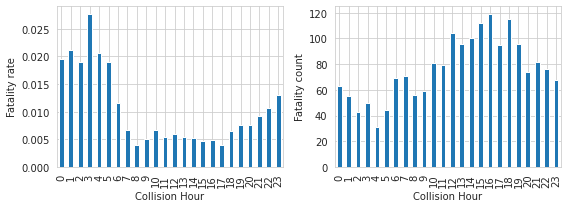

In [8]:
## By Collision hour
# Remove non-valid data
dfplotHOUR = df[~df.C_HOUR.isin(['UU','XX'])]
dfplotHOUR= toNum(dfplotHOUR, "C_HOUR")
## Calculate proportion using groupby category
tcHOUR = calTC(dfplotHOUR, "C_HOUR")
fatalHOUR = calFatal(dfplotHOUR, "C_HOUR")
propHOUR = fatalHOUR/tcHOUR
# Plot the bar graph for fatality rate
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
propHOUR.plot.bar()
plt.xlabel('Collision Hour')
plt.ylabel('Fatality rate')

#Plot bar graph for count of falities
plt.subplot(1, 2, 2)
fatalHOUR.plot.bar()
plt.xlabel('Collision Hour')
plt.ylabel('Fatality count')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


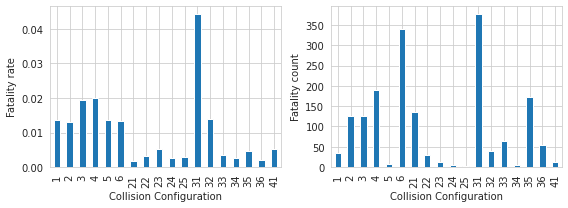

In [9]:
## By collision configuration
# Remove non-valid data
dfplotCONF = df[~df.C_CONF.isin(['UU','XX','QQ'])]
# Redefine data type
dfplotCONF = toNum(dfplotCONF, "C_CONF")
## Calculate proportion using groupby category
tcCONF = calTC(dfplotCONF, "C_CONF")
fatalCONF = calFatal(dfplotCONF, "C_CONF")
propCONF = fatalCONF/tcCONF

# Plot the bar graph for fatality rate
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
propCONF.plot.bar()
plt.xlabel('Collision Configuration')
plt.ylabel('Fatality rate')

#Plot bar graph for count of falities
plt.subplot(1, 2, 2)
fatalCONF.plot.bar()
plt.xlabel('Collision Configuration')
plt.ylabel('Fatality count')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


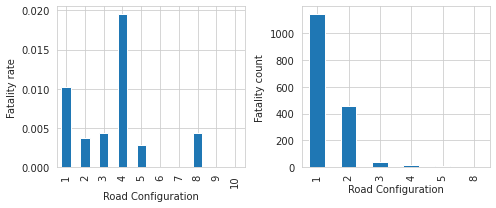

In [10]:
## By road configuration
# Remove non-valid data
dfplotRCFG = df[~df.C_RCFG.isin(['UU','XX','QQ'])]
# Redefine data type
dfplotRCFG = toNum(dfplotRCFG, "C_RCFG")
## Calculate proportion using groupby category
tcRCFG = calTC(dfplotRCFG, "C_RCFG")
fatalRCFG = calFatal(dfplotRCFG, "C_RCFG")
propRCFG = fatalRCFG/tcRCFG
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propRCFG.plot.bar()
plt.xlabel('Road Configuration')
plt.ylabel('Fatality rate')

#Plot bar graph for count of falities
plt.subplot(1, 2, 2)
fatalRCFG.plot.bar()
plt.xlabel('Road Configuration')
plt.ylabel('Fatality count')
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


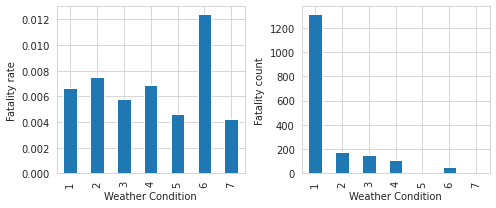

In [11]:
## By weather condition
# Remove non-valid data
dfplotWTHR = df[~df.C_WTHR.isin(['U','X','Q'])]
# Redefine data type
dfplotWTHR = toNum(dfplotWTHR, "C_WTHR")
## Calculate proportion using groupby category
tcWTHR = calTC(dfplotWTHR, "C_WTHR")
fatalWTHR = calFatal(dfplotWTHR, "C_WTHR") 
propWTHR = fatalWTHR/tcWTHR
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propWTHR.plot.bar()
plt.xlabel('Weather Condition')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalWTHR.plot.bar()
plt.xlabel('Weather Condition')
plt.ylabel('Fatality count')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


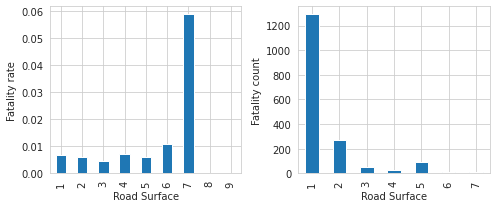

In [12]:
## By road surface
# Remove non-valid data
dfplotRSUR = df[~df.C_RSUR.isin(['U','X','Q'])]
# Redefine data type
dfplotRSUR = toNum(dfplotRSUR, "C_RSUR")
## Calculate proportion using groupby category
tcRSUR = calTC(dfplotRSUR, "C_RSUR")
fatalRSUR = calFatal(dfplotRSUR, "C_RSUR") 
propRSUR = fatalRSUR/tcRSUR
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propRSUR.plot.bar()
plt.xlabel('Road Surface')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalRSUR.plot.bar()
plt.xlabel('Road Surface')
plt.ylabel('Fatality count')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


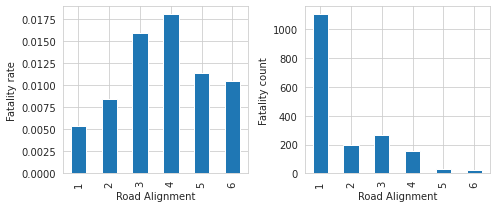

In [13]:
## By road alignment
# Remove non-valid data
dfplotRALN = df[~df.C_RALN.isin(['U','X','Q'])]
# Redefine data type
dfplotRALN = toNum(dfplotRALN, "C_RALN")
## Calculate proportion using groupby category
tcRALN = calTC(dfplotRALN, "C_RALN")
fatalRALN = calFatal(dfplotRALN, "C_RALN") 
propRALN = fatalRALN/tcRALN
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propRALN.plot.bar()
plt.xlabel('Road Alignment')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalRALN.plot.bar()
plt.xlabel('Road Alignment')
plt.ylabel('Fatality count')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


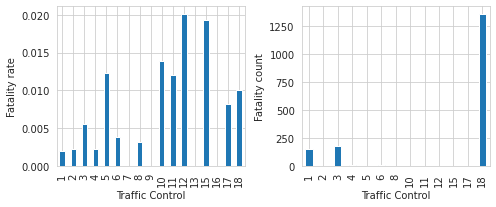

In [14]:
## By traffic control
# Remove non-valid data
dfplotTRAF = df[~df.C_TRAF.isin(['UU','XX','QQ'])]
# Redefine data type
dfplotTRAF = toNum(dfplotTRAF, "C_TRAF")
## Calculate proportion using groupby category
tcTRAF = calTC(dfplotTRAF, "C_TRAF")
fatalTRAF= calFatal(dfplotTRAF, "C_TRAF") 
propTRAF = fatalTRAF/tcTRAF
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propTRAF.plot.bar()
plt.xlabel('Traffic Control')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalTRAF.plot.bar()
plt.xlabel('Traffic Control')
plt.ylabel('Fatality count')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1060: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/l

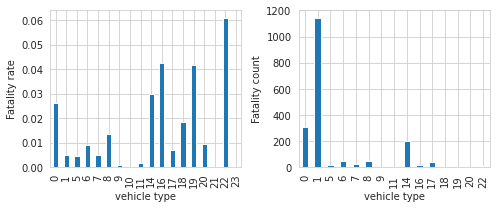

In [15]:
## By vehicle type
# Remove non-valid data
dfplotVTYPE = df[~df.V_TYPE.isin(['UU','XX','QQ'])]
# Convert "NN" to 0 which are pedestrians
indicies = dfplotVTYPE[dfplotVTYPE.V_TYPE.isin(['NN'])].index
dfplotVTYPE.V_TYPE[indicies] = 0
dfplotVTYPE.V_TYPE
# Redefine data type
dfplotVTYPE = toNum(dfplotVTYPE, "V_TYPE")
## Calculate proportion using groupby category
plt.figure(figsize=(7,3))
tcVTYPE = calTC(dfplotVTYPE, "V_TYPE")
fatalVTYPE= calFatal(dfplotVTYPE, "V_TYPE") 
propVTYPE = fatalVTYPE/tcVTYPE
# Plot the bar graph for fatality rate
plt.subplot(1, 2, 1)
propVTYPE.plot.bar()
plt.xlabel('vehicle type')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalVTYPE.plot.bar()
plt.xlabel('vehicle type')
plt.ylabel('Fatality count')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


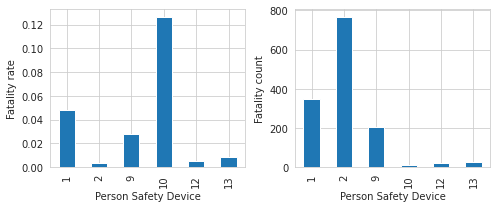

In [16]:
## By person safety device
# Remove non-valid data
dfplotPSAFE = df[~df.P_SAFE.isin(['UU','XX','QQ','NN'])]
# Redefine data type
dfplotPSAFE = toNum(dfplotPSAFE, "P_SAFE")
## Calculate proportion using groupby category
tcPSAFE = calTC(dfplotPSAFE, "P_SAFE")
fatalPSAFE= calFatal(dfplotPSAFE, "P_SAFE") 
propPSAFE = fatalPSAFE/tcPSAFE
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propPSAFE.plot.bar()
plt.xlabel('Person Safety Device')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalPSAFE.plot.bar()
plt.xlabel('Person Safety Device')
plt.ylabel('Fatality count')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


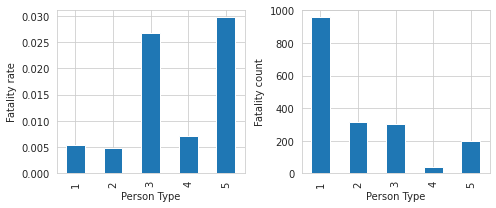

In [17]:
## By person type
# Remove non-valid data
dfplotPUSER = df[~df.P_USER.isin(['U'])]
# Redefine data type
dfplotPUSER = toNum(dfplotPUSER, "P_USER")
## Calculate proportion using groupby category
tcPUSER = calTC(dfplotPUSER, "P_USER")
fatalPUSER = calFatal(dfplotPUSER, "P_USER") 
propPUSER = fatalPUSER/tcPUSER
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propPUSER.plot.bar()
plt.xlabel('Person Type')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalPUSER.plot.bar()
plt.xlabel('Person Type')
plt.ylabel('Fatality count')

plt.tight_layout()


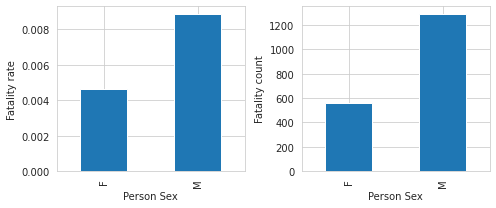

In [18]:
## By sex
# Remove non-valid data
dfplotPSEX = df[~df.P_SEX.isin(['U','N','X'])]
## Calculate proportion using groupby category
tcPSEX = calTC(dfplotPSEX, "P_SEX")
fatalPSEX = calFatal(dfplotPSEX, "P_SEX") 
propPSEX = fatalPSEX/tcPSEX
# Plot the bar graph for fatality rate
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 1)
propPSEX.plot.bar()
plt.xlabel('Person Sex')
plt.ylabel('Fatality rate')

plt.subplot(1, 2, 2)
#Plot bar graph for count of falities
fatalPSEX.plot.bar()
plt.xlabel('Person Sex')
plt.ylabel('Fatality count')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


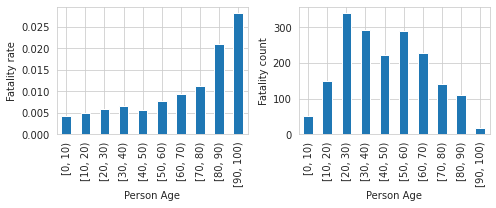

In [19]:
## By age
# Remove non-valid data
dfplotPAGE = df[~df.P_AGE.isin(['UU','NN','XX'])]
# Redefine data type
dfplotPAGE = toNum(dfplotPAGE, "P_AGE")

## Calculate proportion using groupby category
## Each bar represents an age
# tcPAGE = calTC(dfplotPAGE, "P_AGE")
# fatalPAGE = calFatal(dfplotPAGE, "P_AGE") 
# propPAGE = fatalPAGE/tcPAGE
# Plot the bar graph for fatality rate
# plt.subplot(1, 2, 1)
# propPAGE.plot.bar()
# plt.xlabel('Person Age')
# plt.ylabel('Fatality rate')
# plt.subplot(1, 2, 2)
# Plot bar graph for count of falities
# fatalPAGE.plot.bar()
# plt.xlabel('Person Age')
# plt.ylabel('Fatality count')
# plt.tight_layout()

## Plot age histogram in grouped ages
# Split data up in bins between 0 to 100, width of 10
bin_range = np.arange(0,110,10)
tcout, bins  = pd.cut(dfplotPAGE['P_AGE'], bins=bin_range, include_lowest=True, right=False, retbins=True)
tcAGE = tcout.value_counts(sort = False)
fatalout, bins  = pd.cut(dfplotPAGE[dfplotPAGE['P_ISEV'] == 1]['P_AGE'], bins=bin_range, include_lowest=True, right=False, retbins=True)
fatalAGE = fatalout.value_counts(sort = False)
propAGE = fatalAGE/tcAGE

# Plot the two histograms
plt.figure(figsize=(7,3))
plt.subplot(1, 2, 2)
fatalAGE.plot.bar()
plt.xlabel('Person Age')
plt.ylabel('Fatality count')

plt.subplot(1, 2, 1)
propAGE.plot.bar()
plt.xlabel('Person Age')
plt.ylabel('Fatality rate')
plt.tight_layout()

## Logistic Regression Model

#### Generate dictionary for each category


In [20]:
# Create dictionaries for each category
dictMNTH = {
  1:'MNTH1',2:'MNTH2',3:'MNTH3',4:'MNTH4',5:'MNTH5',6:'MNTH6',7:'MNTH7',8:'MNTH8',9:'MNTH9',10:'MNTH10',11:'MNTH11',12:'MNTH12',
}

dictCONF = {
  1: 'CONF1',2: 'CONF2',3: 'CONF3',4: 'CONF4',5: 'CONF5',6: 'CONF6',21: 'CONF21',22: 'CONF22',23: 'CONF23',24: 'CONF24',
  25: 'CONF25',31: 'CONF31',32: 'CONF32',33: 'CONF33',34: 'CONF34',35: 'CONF35',36: 'CONF36',41: 'CONF41'
}

dictRCFG = {
  1:'RCFG1', 2:'RCFG2', 3:'RCFG3', 4:'RCFG4', 5:'RCFG5',6:'RCFG6',7:'RCFG7',8:'RCFG8',9:'RCFG9',10:'RCFG10',11:'RCFG11',12:'RCFG12'
}


dictWTHR = {
  1:'WTHR1', 2:'WTHR2', 3:'WTHR3', 4:'WTHR4', 5:'WTHR5',6:'WTHR6',7:'WTHR7'
}

dictRSUR = {
  1:'RSUR1', 2:'RSUR2', 3:'RSUR3', 4:'RSUR4', 5:'RSUR5',6:'RSUR6',7:'RSUR7',8:'RSUR8',9:'RSUR9'
}

dictRALN = {
  1:'RALN1', 2:'RALN2', 3:'RALN3', 4:'RALN4', 5:'RALN5',6:'RALN6'
}

dictVTYPE = {
  0:'VTYPENN',1:'VTYPE1', 5:'VTYPE5',6:'VTYPE6',7:'VTYPE7',8:'VTYPE8',9:'VTYPE9',10:'VTYPE10',
  11:'VTYPE11',14:'VTYPE14',16:'VTYPE16',17:'VTYPE17',18:'VTYPE18',19:'VTYPE19',
  20:'VTYPE20',21:'VTYPE21',22:'VTYPE22',23:'VTYPE23'
}

dictPSEX = {
    1:'SEXM', 2:'SEXF'
}

dictPUSER = {
  1:'PUSER1', 2:'PUSER2', 3:'PUSER3', 4:'PUSER4', 5:'PUSER5'
}

#### Perform data cleaning and set-up for one-hot encoding

In [21]:
## Perform data cleaning
dfLog = df.drop(columns=['C_YEAR','C_WDAY','C_HOUR','C_SEV','C_VEHS','C_TRAF','V_ID','V_YEAR','P_ID','P_PSN','P_SAFE','C_CASE'], axis=1)
# Convert 'NN' code to 0, representing pedestrians
indicies = dfLog[dfLog.V_TYPE.isin(['NN'])].index
dfLog.V_TYPE[indicies] = 0
# Convert sex into numeric codes where 1 = Male, 2 = Female
indicies = dfLog[dfLog.P_SEX.isin(['M'])].index
dfLog.P_SEX[indicies] = 1
indicies = dfLog[dfLog.P_SEX.isin(['F'])].index
dfLog.P_SEX[indicies] = 2
# Remove all unknown/NaN data
dfLog = dfLog[dfLog.isin(['U','N','X','Q','UU','NN','XX','QQ']).ne(True).all(axis=1)]
# Convert to data tonumeric
cols = dfLog.columns
dfLog[cols] = dfLog[cols].apply(pd.to_numeric, errors='coerce')
## Perform one-hot encoding for each categorical variable using dummy variables
dumMNTH = pd.get_dummies(dfLog['C_MNTH'])
dumCONF = pd.get_dummies(dfLog['C_CONF'])
dumRCFG = pd.get_dummies(dfLog['C_RCFG'])
dumWTHR = pd.get_dummies(dfLog['C_WTHR'])
dumRSUR = pd.get_dummies(dfLog['C_RSUR'])
dumRALN = pd.get_dummies(dfLog['C_RALN'])
dumVTYPE = pd.get_dummies(dfLog['V_TYPE'])
dumPSEX = pd.get_dummies(dfLog['P_SEX'])
dumPUSER = pd.get_dummies(dfLog['P_USER'])

# Create column names for the new DataFrames
dumMNTH = dumMNTH.rename(columns = dictMNTH, inplace = False)
dumCONF = dumCONF.rename(columns = dictCONF, inplace = False)
dumRCFG =dumRCFG.rename(columns = dictRCFG, inplace = False)
dumWTHR =dumWTHR.rename(columns = dictWTHR, inplace = False)
dumRSUR =dumRSUR.rename(columns = dictRSUR, inplace = False)
dumRALN =dumRALN.rename(columns = dictRALN, inplace = False)
dumVTYPE =dumVTYPE.rename(columns = dictVTYPE, inplace = False)
dumPSEX =dumPSEX.rename(columns = dictPSEX, inplace = False)
dumPUSER =dumPUSER.rename(columns = dictPUSER, inplace = False)

In [22]:
# drop all categorical variables in original dataframe
X = dfLog.drop(columns=['C_MNTH','C_CONF','C_RCFG','C_WTHR','C_RSUR','C_RALN','V_TYPE','P_SEX','P_USER'], axis=1)
# Concat the dummy DataFrames Together
dummies = pd.concat([dumMNTH,dumCONF,dumRCFG,dumWTHR,dumRSUR,dumRALN,dumVTYPE,dumPSEX,dumPUSER],axis=1)
# Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)
# Preview of Result
X.head()

,P_AGE,P_ISEV,MNTH1,MNTH2,MNTH3,MNTH4,MNTH5,MNTH6,MNTH7,MNTH8,MNTH9,MNTH10,MNTH11,MNTH12,CONF1,CONF2,CONF3,CONF4,CONF5,CONF6,CONF21,CONF22,CONF23,CONF24,CONF25,CONF31,CONF32,CONF33,CONF34,CONF35,CONF36,CONF41,RCFG1,RCFG2,RCFG3,RCFG4,RCFG5,RCFG6,RCFG7,RCFG8,...,WTHR4,WTHR5,WTHR6,WTHR7,RSUR1,RSUR2,RSUR3,RSUR4,RSUR5,RSUR6,RSUR7,RSUR8,RSUR9,RALN1,RALN2,RALN3,RALN4,RALN5,RALN6,VTYPENN,VTYPE1,VTYPE5,VTYPE6,VTYPE7,VTYPE8,VTYPE9,VTYPE10,VTYPE11,VTYPE14,VTYPE17,VTYPE18,VTYPE21,VTYPE23,SEXM,SEXF,PUSER1,PUSER2,PUSER3,PUSER4,PUSER5
0,75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
6,34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [23]:
# Set Y as Target class, Had Affair
Y = dfLog.P_ISEV

# Preview
Y

0         0
5         0
6         0
7         0
8         0
         ..
289806    0
289807    0
289811    0
289812    0
289818    0
Name: P_ISEV, Length: 209421, dtype: int64

In [24]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('MNTH1',axis=1)
X = X.drop('CONF1',axis=1)
X = X.drop('RCFG1',axis=1)
X = X.drop('WTHR1',axis=1)
X = X.drop('RSUR1',axis=1)
X = X.drop('RALN1',axis=1)
X = X.drop('VTYPENN',axis=1)
X = X.drop('SEXM',axis=1)
X = X.drop('PUSER1',axis=1)

# Drop affairs column so Y target makes sense
X = X.drop(['P_ISEV'],axis=1)

# Preview
X.head()

,P_AGE,MNTH2,MNTH3,MNTH4,MNTH5,MNTH6,MNTH7,MNTH8,MNTH9,MNTH10,MNTH11,MNTH12,CONF2,CONF3,CONF4,CONF5,CONF6,CONF21,CONF22,CONF23,CONF24,CONF25,CONF31,CONF32,CONF33,CONF34,CONF35,CONF36,CONF41,RCFG2,RCFG3,RCFG4,RCFG5,RCFG6,RCFG7,RCFG8,RCFG9,RCFG10,WTHR2,WTHR3,WTHR4,WTHR5,WTHR6,WTHR7,RSUR2,RSUR3,RSUR4,RSUR5,RSUR6,RSUR7,RSUR8,RSUR9,RALN2,RALN3,RALN4,RALN5,RALN6,VTYPE1,VTYPE5,VTYPE6,VTYPE7,VTYPE8,VTYPE9,VTYPE10,VTYPE11,VTYPE14,VTYPE17,VTYPE18,VTYPE21,VTYPE23,SEXF,PUSER2,PUSER3,PUSER4,PUSER5
0,75,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9933292267728643

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, log_model.predict(X))

array([[208024,      0],
       [  1397,      0]])

In [28]:
# Show full table output
# pd.set_option('display.max_rows', None)
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df


,0,1
0,P_AGE,[0.01781662489064272]
1,MNTH2,[-0.4327535710470642]
2,MNTH3,[-0.2449432417635724]
3,MNTH4,[-0.24661346398067138]
4,MNTH5,[-0.37193964517670663]
...,...,...
70,SEXF,[-0.5391649556253498]
71,PUSER2,[0.16399790925461152]
72,PUSER3,[0.968929791421091]
73,PUSER4,[-0.06187966340975887]


#### Test and train model using default settings (25% test)

In [29]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Compare accuracy, precision, recall scores

In [30]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
resultsDefault = metrics.accuracy_score(Y_test,class_predict)

print("Accuracy: %.2f%%" % (resultsDefault*100.0)) 

Accuracy: 99.28%


[[51977     0]
 [  379     0]]


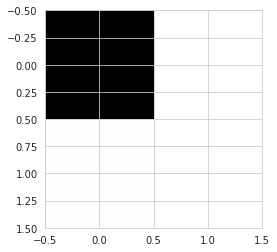

In [31]:
# Obtain confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, class_predict)
print(confusion_matrix)
plt.imshow(confusion_matrix, cmap='binary', interpolation='None')
plt.show()

In [32]:
# Obtain precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(Y_test, class_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     51977
           1       0.00      0.00      0.00       379

    accuracy                           0.99     52356
   macro avg       0.50      0.50      0.50     52356
weighted avg       0.99      0.99      0.99     52356



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Perform k-fold cross validation using k = 10

In [33]:
# perform k-fold cross validation and calculate the accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model_kfold = LogisticRegression()
results_kfold = cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 99.33%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# perform k-fold cross validation and generate the corresponding confusion matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
clf = make_pipeline(MinMaxScaler(), LogisticRegression())
y_pred = cross_val_predict(clf, X, Y, cv=10)
conf_matKfold = confusion_matrix(Y, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
